In [1]:
import os
print(os.chdir('/home/raid/Desktop/Soham/BTP'))

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
from utils.preprocessing import fill_nan, scale_features, analyte_vs_sensor
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings("ignore")

None


In [2]:
data = pd.read_excel('data/CFU per mL Analyte1_analyte2_analyte3_Sensor1_Sensor2_Sensor3.xlsx')
data.drop(['Unnamed: 4', 'Unnamed: 8'], axis=1, inplace=True)
data = data[['Analyte1_Sensor1', 'Analyte1_Sensor2', 'Analyte1_Sensor3', 'Analyte2_sensor1', 'Analyte2_sensor2', 'Analyte2_sensor3', 'Analyte3_Sensor1', 'Analyte3_Sensor2', 'Analyte3_Sensor3', 'CFU/mL']]
data.head(5)

,Analyte1_Sensor1,Analyte1_Sensor2,Analyte1_Sensor3,Analyte2_sensor1,Analyte2_sensor2,Analyte2_sensor3,Analyte3_Sensor1,Analyte3_Sensor2,Analyte3_Sensor3,CFU/mL
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-68.02,70.734,52.47,NaN,NaN,NaN,NaN,NaN,NaN,30500000.0
2,-95.70,50.162,32.63,NaN,NaN,NaN,NaN,NaN,NaN,3050000.0
3,-99.96,-8.390,-10.41,NaN,NaN,NaN,NaN,NaN,NaN,305000.0
4,-107.42,-18.700,-23.93,NaN,NaN,NaN,NaN,NaN,NaN,30500.0


## Preprocessing

In [3]:
analyte1 = data.iloc[1:11,:]
analyte1['Label'] = [1 for i in range(10)]

analyte2 = data.iloc[11:21,:]
analyte2['Label'] = [2 for i in range(10)]

analyte3 = data.iloc[21:,:]
analyte3['Label'] = [3 for i in range(10)]
analyte3.head(3)

,Analyte1_Sensor1,Analyte1_Sensor2,Analyte1_Sensor3,Analyte2_sensor1,Analyte2_sensor2,Analyte2_sensor3,Analyte3_Sensor1,Analyte3_Sensor2,Analyte3_Sensor3,CFU/mL,Label
21,NaN,NaN,NaN,NaN,NaN,NaN,80.430,-36.7,102.40,2880000.0,3
22,NaN,NaN,NaN,NaN,NaN,NaN,109.723,-53.4,73.80,288000.0,3
23,NaN,NaN,NaN,NaN,NaN,NaN,139.061,-60.1,28.14,28800.0,3


In [4]:
analyte1 = fill_nan(analyte1)
analyte2 = fill_nan(analyte2)
analyte3 = fill_nan(analyte3)

f = analyte3.columns.to_list()

analyte1 = scale_features(analyte1, f)
analyte2 = scale_features(analyte2, f)
analyte3 = scale_features(analyte3, f)

analyte1.head(3)

,Analyte1_Sensor1,Analyte1_Sensor2,Analyte1_Sensor3,Analyte2_sensor1,Analyte2_sensor2,Analyte2_sensor3,Analyte3_Sensor1,Analyte3_Sensor2,Analyte3_Sensor3,CFU/mL,Label
1,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.00,1
2,0.760885,0.848995,0.835775,0.0,0.0,0.0,0.0,0.0,0.0,0.10,1
3,0.724084,0.419205,0.479513,0.0,0.0,0.0,0.0,0.0,0.0,0.01,1


## Analysis

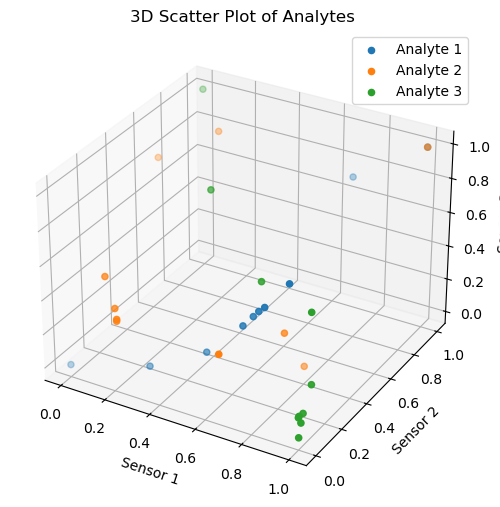

In [5]:
fig = plt.figure(figsize=(6,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(analyte1['Analyte1_Sensor1'], analyte1['Analyte1_Sensor2'], analyte1['Analyte1_Sensor3'], label='Analyte 1')

ax.scatter3D(analyte2['Analyte2_sensor1'], analyte2['Analyte2_sensor2'], analyte2['Analyte2_sensor3'], label='Analyte 2')

ax.scatter3D(analyte3['Analyte3_Sensor1'], analyte3['Analyte3_Sensor2'], analyte3['Analyte3_Sensor3'], label='Analyte 3')

ax.set_xlabel('Sensor 1')
ax.set_ylabel('Sensor 2')
ax.set_zlabel('Sensor 3')
ax.set_title('3D Scatter Plot of Analytes')

ax.legend()
plt.show()


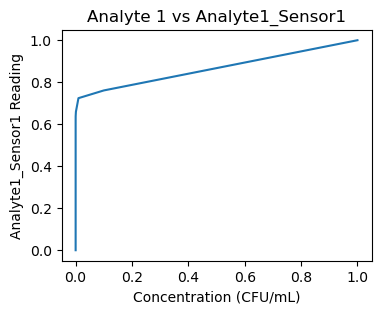

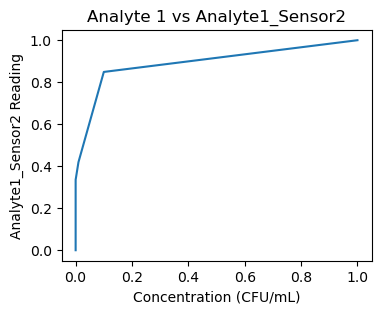

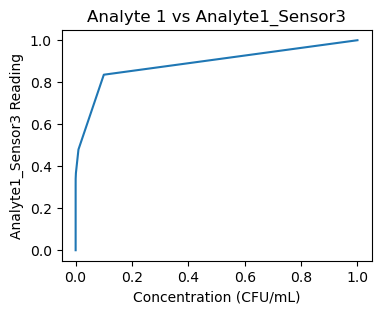

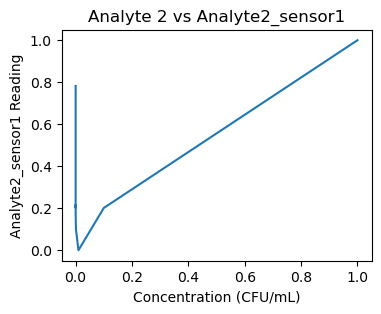

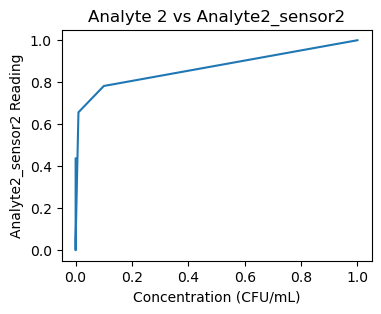

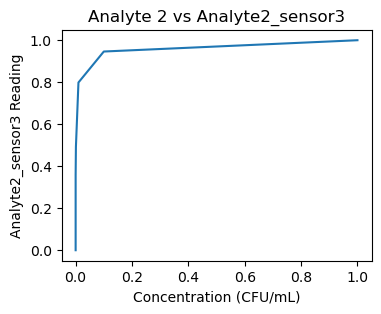

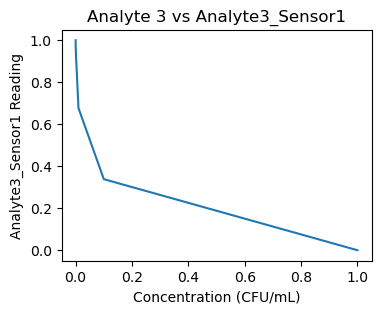

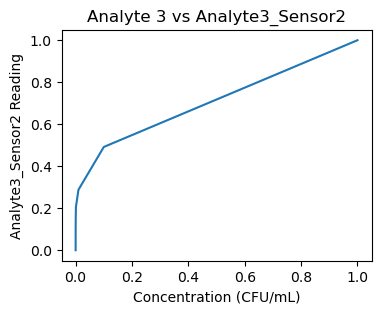

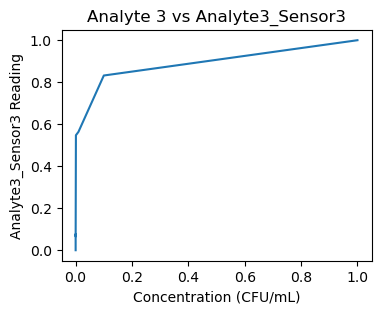

In [6]:
''' Understanding trends of CFU/mL with respect to sensors for each analyte '''

# Analyte 1
analyte_vs_sensor(analyte1, 'Analyte 1', 'Analyte1_Sensor1')
analyte_vs_sensor(analyte1, 'Analyte 1', 'Analyte1_Sensor2')
analyte_vs_sensor(analyte1, 'Analyte 1', 'Analyte1_Sensor3')

# Analyte 2
analyte_vs_sensor(analyte2, 'Analyte 2', 'Analyte2_sensor1')
analyte_vs_sensor(analyte2, 'Analyte 2', 'Analyte2_sensor2')
analyte_vs_sensor(analyte2, 'Analyte 2', 'Analyte2_sensor3')

# Analyte 3
analyte_vs_sensor(analyte3, 'Analyte 3', 'Analyte3_Sensor1')
analyte_vs_sensor(analyte3, 'Analyte 3', 'Analyte3_Sensor2')
analyte_vs_sensor(analyte3, 'Analyte 3', 'Analyte3_Sensor3')

## Segregation based on Tasks

In [7]:
''' For the clustering/classification task, we will only need sensor readings and the label. So, we will drop the CFU/mL column from the data. '''

cluster_data = pd.concat([analyte1, analyte2, analyte3], axis=0)
cluster_data.drop(['CFU/mL'], axis=1, inplace=True)

''' For the CFU concentration prediction, we will only need sensor readings. So, we will drop the label column from the data. '''

conc_data = pd.concat([analyte1, analyte2, analyte3], axis=0)
conc_data.drop(['Label'], axis=1, inplace=True)

cluster_data.to_csv('data/cluster_data.csv', index=False)
conc_data.to_csv('data/conc_data.csv', index=False)

In [2]:
''' We have 10 points of Analyte1 data, Analyte2 data and Analyte3 data respectively. '''

analyte1 = pd.read_csv('../data/Analyte1.csv')
analyte2 = pd.read_csv('../data/Analyte2.csv')
analyte3 = pd.read_csv('../data/Analyte3.csv')

analyte1.head(10)

,CFU/mL,Analyte1_Sensor2,Analyte1_Sensor1,Analyte1_Sensor3
0,30500000.0,70.734,-68.020,52.47
1,3050000.0,50.162,-95.700,32.63
2,305000.0,-8.390,-99.960,-10.41
3,30500.0,-18.700,-107.420,-23.93
4,3050.0,-19.620,-109.940,-27.24
5,700.0,-20.620,-112.206,-31.24
6,80.0,-25.250,-115.180,-36.27
7,10.0,-35.580,-128.550,-54.39
8,0.0,-50.570,-150.230,-64.37
9,0.0,-65.500,-183.780,-68.34


## Analyte 1

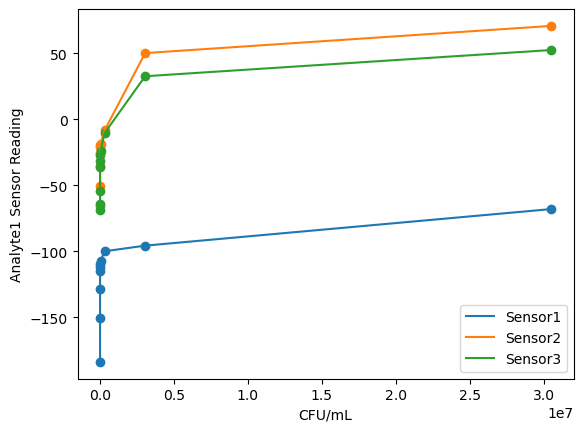

In [3]:
''' Trends of CFU/mL data with Sensor readings '''

plt.scatter(analyte1['CFU/mL'], analyte1['Analyte1_Sensor1'])
plt.plot(analyte1['CFU/mL'], analyte1['Analyte1_Sensor1'], label='Sensor1')

plt.scatter(analyte1['CFU/mL'], analyte1['Analyte1_Sensor2'])
plt.plot(analyte1['CFU/mL'], analyte1['Analyte1_Sensor2'], label='Sensor2')

plt.scatter(analyte1['CFU/mL'], analyte1['Analyte1_Sensor3'])
plt.plot(analyte1['CFU/mL'], analyte1['Analyte1_Sensor3'], label='Sensor3')

plt.xlabel('CFU/mL')
plt.ylabel('Analyte1 Sensor Reading')
plt.legend()
plt.savefig('../docs/plots/analyte1.png')
plt.show()

## Analyte 2

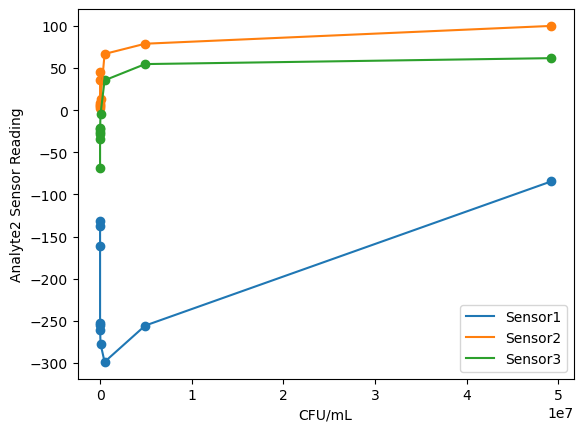

In [4]:
''' Trends of CFU/mL data with Sensor readings '''

plt.scatter(analyte2['CFU/mL'], analyte2['Analyte2_sensor1'])
plt.plot(analyte2['CFU/mL'], analyte2['Analyte2_sensor1'], label='Sensor1')

plt.scatter(analyte2['CFU/mL'], analyte2['Analyte2_sensor2'])
plt.plot(analyte2['CFU/mL'], analyte2['Analyte2_sensor2'], label='Sensor2')

plt.scatter(analyte2['CFU/mL'], analyte2['Analyte2_sensor3'])
plt.plot(analyte2['CFU/mL'], analyte2['Analyte2_sensor3'], label='Sensor3')

plt.xlabel('CFU/mL')
plt.ylabel('Analyte2 Sensor Reading')
plt.legend()
plt.savefig('../docs/plots/analyte2.png')
plt.show()

## Analyte 3

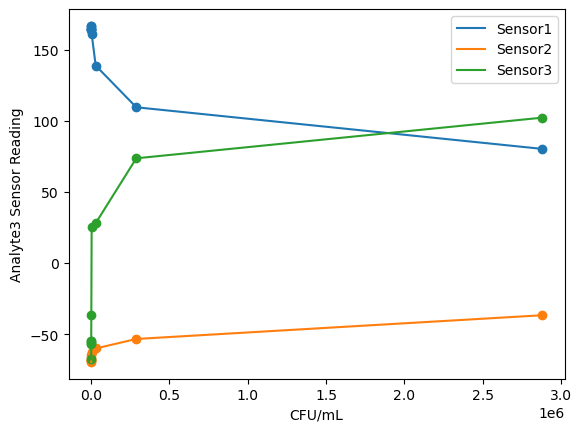

In [5]:
''' Trends of CFU/mL data with Sensor readings '''

plt.scatter(analyte3['CFU/mL'], analyte3['Analyte3_Sensor1'])
plt.plot(analyte3['CFU/mL'], analyte3['Analyte3_Sensor1'], label='Sensor1')

plt.scatter(analyte3['CFU/mL'], analyte3['Analyte3_Sensor2'])
plt.plot(analyte3['CFU/mL'], analyte3['Analyte3_Sensor2'], label='Sensor2')

plt.scatter(analyte3['CFU/mL'], analyte3['Analyte3_Sensor3'])
plt.plot(analyte3['CFU/mL'], analyte3['Analyte3_Sensor3'], label='Sensor3')

plt.xlabel('CFU/mL')
plt.ylabel('Analyte3 Sensor Reading')
plt.legend()
plt.savefig('../docs/plots/analyte3.png')
plt.show()